##  1.2 Model Tuning

In [9]:
import pandas as pd

# Import ML model libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb 

In [2]:
# Import data

df_feature = pd.read_csv('df_feature.csv',index_col=0)
df_clean = pd.read_csv('df_clean.csv',index_col=0)

In [3]:
# perform train_test_split

X=df_feature
y=df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [5]:
# ignore warnings to make output area cleaner 

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [14]:
%%time

# first model: random forest classifier
# initiate a random forest classifier with random state 0 and 100 estimators

clf_forest=RandomForestClassifier(n_estimators=80,random_state=0)

# train the model using the training set and make predictions on testing set

clf_forest.fit(X_train,y_train)
y_pred_forest=clf_forest.predict(X_test)

# output the confusion matrix and classification report

cnf_forest = metrics.confusion_matrix(y_test, y_pred_forest)

print(cnf_forest)
print(classification_report(y_test, y_pred_forest, digits=6))

[[46235  7573]
 [19231 92079]]
              precision    recall  f1-score   support

           0   0.706244  0.859259  0.775274     53808
           1   0.924006  0.827230  0.872944    111310

    accuracy                       0.837668    165118
   macro avg   0.815125  0.843245  0.824109    165118
weighted avg   0.853042  0.837668  0.841116    165118

Wall time: 2min 21s


In [13]:
%%time

# second model: logistic regression classifier

from sklearn.linear_model import LogisticRegression

# initiate a logistic regression classifier with random state 0 

clf_logreg = LogisticRegression(random_state=0)

# train the model using the training set and make predictions on testing set

clf_logreg.fit(X_train, y_train)
y_pred_logreg = clf_logreg.predict(X_test)

# output the confusion matrix and classification report

cnf_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)

print(cnf_logreg)
print(classification_report(y_test, y_pred_logreg, digits=6))

[[44617  9191]
 [18405 92905]]
              precision    recall  f1-score   support

           0   0.707959  0.829189  0.763794     53808
           1   0.909977  0.834651  0.870688    111310

    accuracy                       0.832871    165118
   macro avg   0.808968  0.831920  0.817241    165118
weighted avg   0.844144  0.832871  0.835854    165118

Wall time: 7.5 s


In [15]:
%%time

# third model: decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# initiate a decision tree classifier with random state=0

clf_tree = DecisionTreeClassifier(random_state=0)

# train the model using the training set and make predictions on testing set

clf_tree.fit(X_train,y_train)
y_pred_tree = clf_tree.predict(X_test) 

# output the confusion matrix and classification report

cnf_tree = metrics.confusion_matrix(y_test, y_pred_tree)

print(cnf_tree)
print(classification_report(y_test, y_pred_tree, digits=6))

[[45891  7917]
 [19157 92153]]
              precision    recall  f1-score   support

           0   0.705494  0.852866  0.772212     53808
           1   0.920885  0.827895  0.871918    111310

    accuracy                       0.836032    165118
   macro avg   0.813190  0.840380  0.822065    165118
weighted avg   0.850695  0.836032  0.839426    165118

Wall time: 17.6 s


In [11]:
%%time

# fourth model: naive bayes classifier

from sklearn.naive_bayes import GaussianNB

# initiate a naive bayes classifier

clf_gnb = GaussianNB()

# train the model using the training set and make predictions on testing set

clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test) 

# output the confusion matrix and classification report

cnf_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)

print(cnf_gnb)
print(classification_report(y_test, y_pred_gnb, digits=6))

[[51794  2014]
 [35205 76105]]
              precision    recall  f1-score   support

           0   0.595340  0.962571  0.735674     53808
           1   0.974219  0.683721  0.803520    111310

    accuracy                       0.774592    165118
   macro avg   0.784779  0.823146  0.769597    165118
weighted avg   0.850751  0.774592  0.781411    165118

Wall time: 1.76 s


In [16]:
%%time

!pip install xgboost

# fifth model: xgboost classifier

import xgboost as xgb 

# initiate a xgboost classifier

clf_xgb = xgb.XGBClassifier()

# train the model using the training set and make predictions on testing set

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test) 

# output the confusion matrix and classification report

cnf_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

print(cnf_xgb)
print(classification_report(y_test, y_pred_xgb, digits=6))

[[46348  7460]
 [19394 91916]]
              precision    recall  f1-score   support

           0   0.704998  0.861359  0.775374     53808
           1   0.924932  0.825766  0.872540    111310

    accuracy                       0.837365    165118
   macro avg   0.814965  0.843562  0.823957    165118
weighted avg   0.853261  0.837365  0.840876    165118

Wall time: 15.2 s


In [17]:
%%time

# sixth model: knn classifier

from sklearn.neighbors import KNeighborsClassifier as Knn

# initiate a knn classifier

clf_knn=Knn(n_neighbors=5)

# train the model using the training set and make predictions on testing set

clf_knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)

# output the confusion matrix and classification report

cnf_knn = metrics.confusion_matrix(y_test, y_pred_knn)

print(cnf_knn)
print(classification_report(y_test, y_pred_knn, digits=6))

[[43416 10392]
 [19211 92099]]
              precision    recall  f1-score   support

           0   0.693247  0.806869  0.745755     53808
           1   0.898606  0.827410  0.861539    111310

    accuracy                       0.820716    165118
   macro avg   0.795927  0.817139  0.803647    165118
weighted avg   0.831684  0.820716  0.823808    165118

Wall time: 10min 45s


Based on the confusion matrices and required computational time, we decide to proceed with hyperparameter tuning with random forest classifier, decision tree classifier, xgboost classifier, and logistic regression classifier. Since the naive bayes model make predictions really fast, we also want to see how well the model can perform after tuning.

In [21]:
%%time
# Hyperparameter tuning for random forest classifier
clf_forest=RandomForestClassifier(n_estimators=80,random_state=0)
param1 = {'max_depth':[5,10,20,50,70,None]}
grid_cv1 = GridSearchCV(clf_forest, param_grid=param1, cv=5, scoring='accuracy',n_jobs=-1)
grid_cv1.fit(X_train,y_train)
print('Best parameters (random forest classifier):', grid_cv1.best_params_)
print('Best Accuracy:', grid_cv1.best_score_)

Best parameters (random forest classifier): {'max_depth': 70}
Best Accuracy: 0.8376969025362142
Wall time: 5min 55s


In [18]:
%%time
# Hyperparameter tuning for logistic regression classifier
clf_logreg = LogisticRegression(random_state=0)
param2 = {'C':[0.001,0.01,0.1,1,5,10],
        'solver':['newton-cg','saga','sag','lbfgs']}
grid_cv2 = GridSearchCV(clf_logreg, param_grid=param2, cv=5, scoring='accuracy',n_jobs=-1)
grid_cv2.fit(X_train,y_train)
print('Best parameters (logistic regression classifier):', grid_cv2.best_params_)
print('Best Accuracy:', grid_cv2.best_score_)

Best parameters (logistic regression classifier): {'C': 10, 'solver': 'sag'}
Best Accuracy: 0.8326225810740395
Wall time: 3min 33s


In [19]:
%%time
# Hyperparameter tuning for decision tree classifier
clf_tree = DecisionTreeClassifier(random_state=0)
param3 = {'max_depth':[5,10,20,50,70,None]}
grid_cv3 = GridSearchCV(clf_tree, param_grid=param3, cv=5, scoring='accuracy',n_jobs=-1)
grid_cv3.fit(X_train,y_train)
print('Best parameters (decision tree classifier):', grid_cv3.best_params_)
print('Best Accuracy:', grid_cv3.best_score_)

Best parameters (decision tree classifier): {'max_depth': 70}
Best Accuracy: 0.8350104944743985
Wall time: 42.2 s


In [22]:
%%time
# Hyperparameter tuning for naive bayes classifier
clf_gnb = GaussianNB()
param4 = {'var_smoothing' : [1e-11, 1e-10, 1e-9]}
grid_cv4 = GridSearchCV(clf_gnb, param_grid=param4, cv=5, scoring='accuracy',n_jobs=-1)
grid_cv4.fit(X_train,y_train)
print('Best parameters (naive bayes classifier):', grid_cv4.best_params_)
print('Best Accuracy:', grid_cv4.best_score_)

Best parameters (naive bayes classifier): {'var_smoothing': 1e-09}
Best Accuracy: 0.7729895394192481
Wall time: 4.45 s


In [20]:
%%time
# Hyperparameter tuning for xgboost classifier
clf_xgb = xgb.XGBClassifier()
param5 = {'max_depth': [3,5,7,10,15]}
grid_cv5 = GridSearchCV(clf_xgb, param_grid=param5, cv=5, scoring='accuracy',n_jobs=-1)
grid_cv5.fit(X_train,y_train)
print('Best parameters (xgboost classifier):', grid_cv5.best_params_)
print('Best Accuracy:', grid_cv5.best_score_)

Best parameters (xgboost classifier): {'max_depth': 10}
Best Accuracy: 0.8383613657150105
Wall time: 6min 26s


Based on the tuning results, xgboost classifier is the winner! The prediction accuracy on validation set is 83.84%.
We are going to proceed with feature selection using the xgboost classifier.

## Part4 Visualizations, storytelling, recommendations (Based on Part1 Results)

### confusion matrix

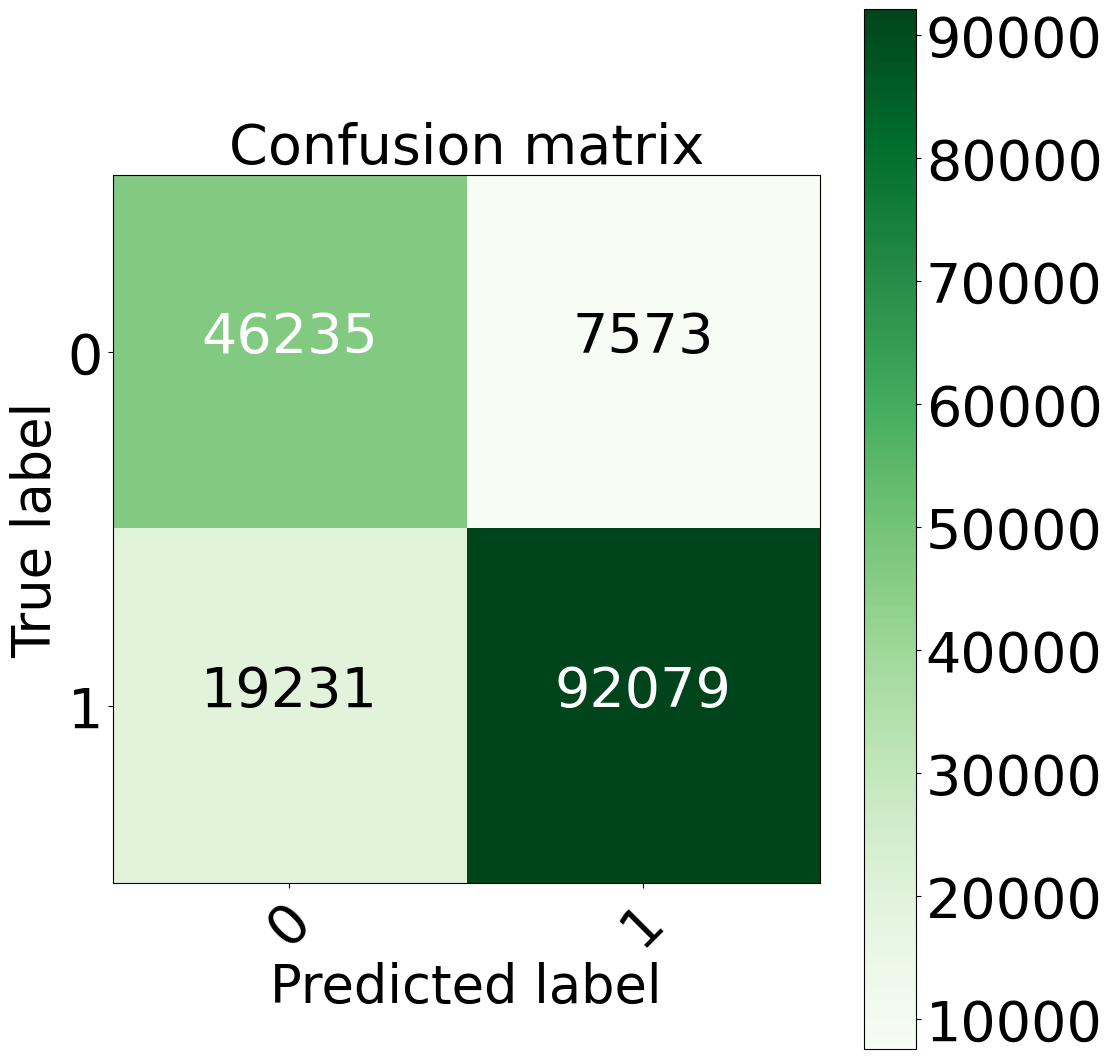

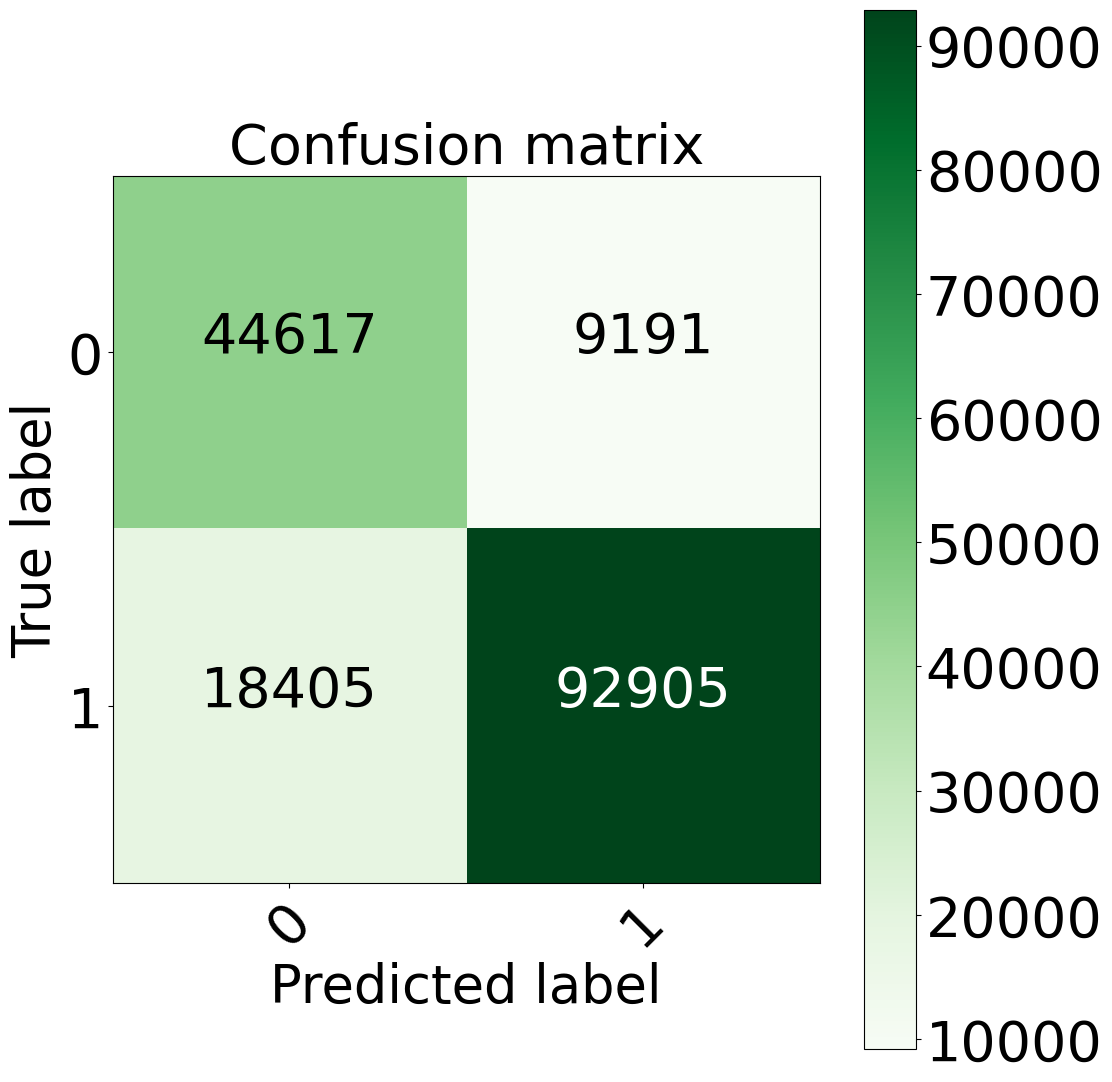

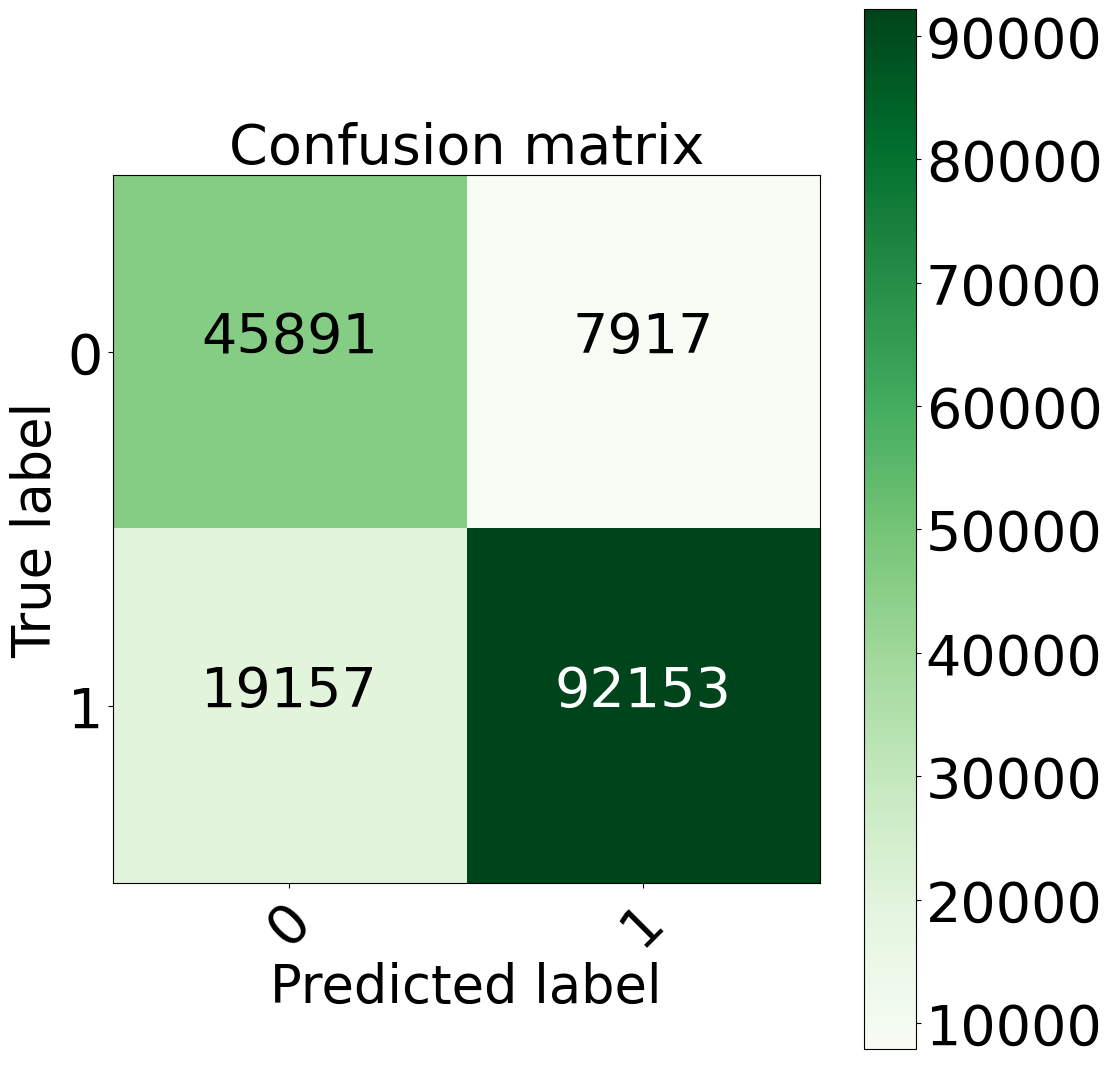

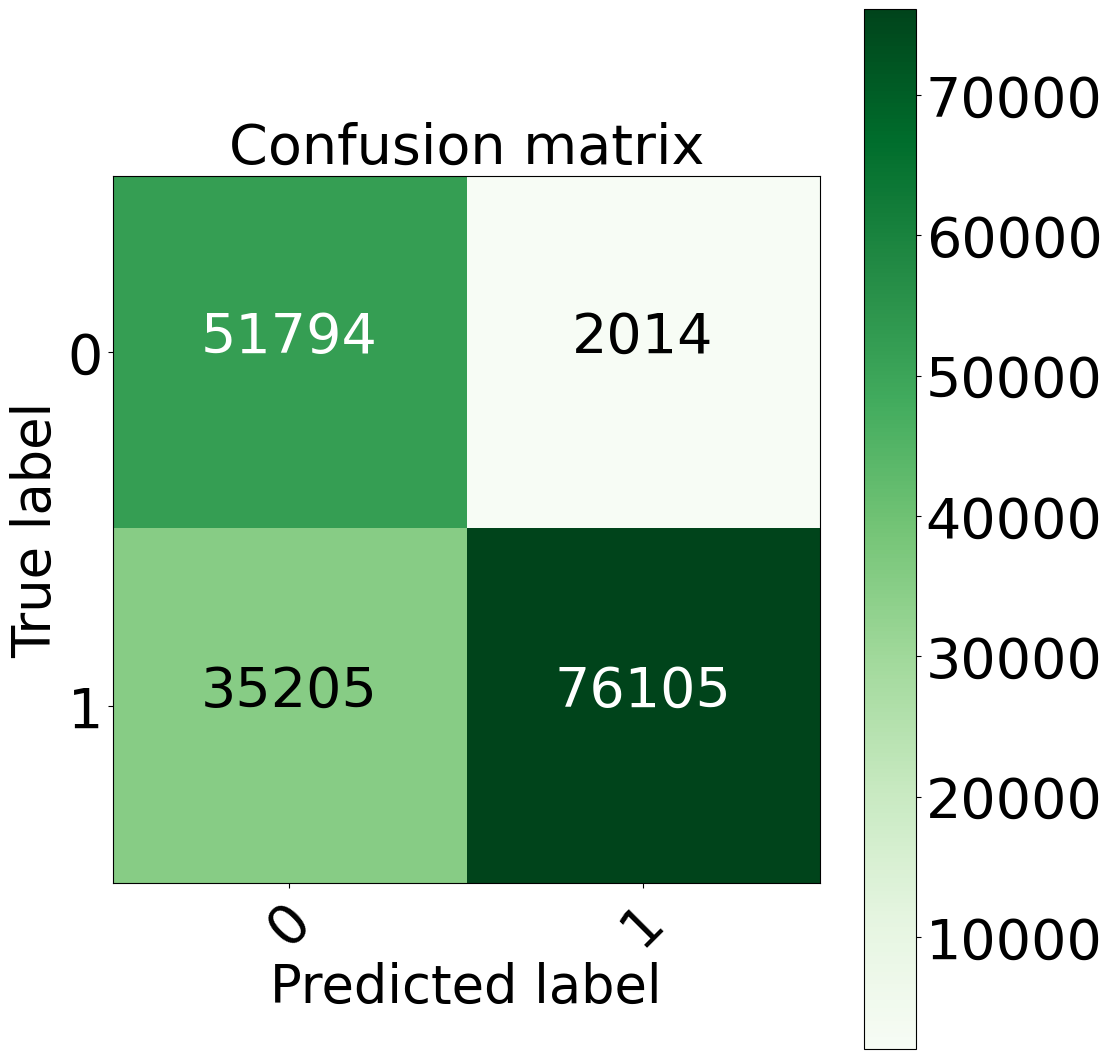

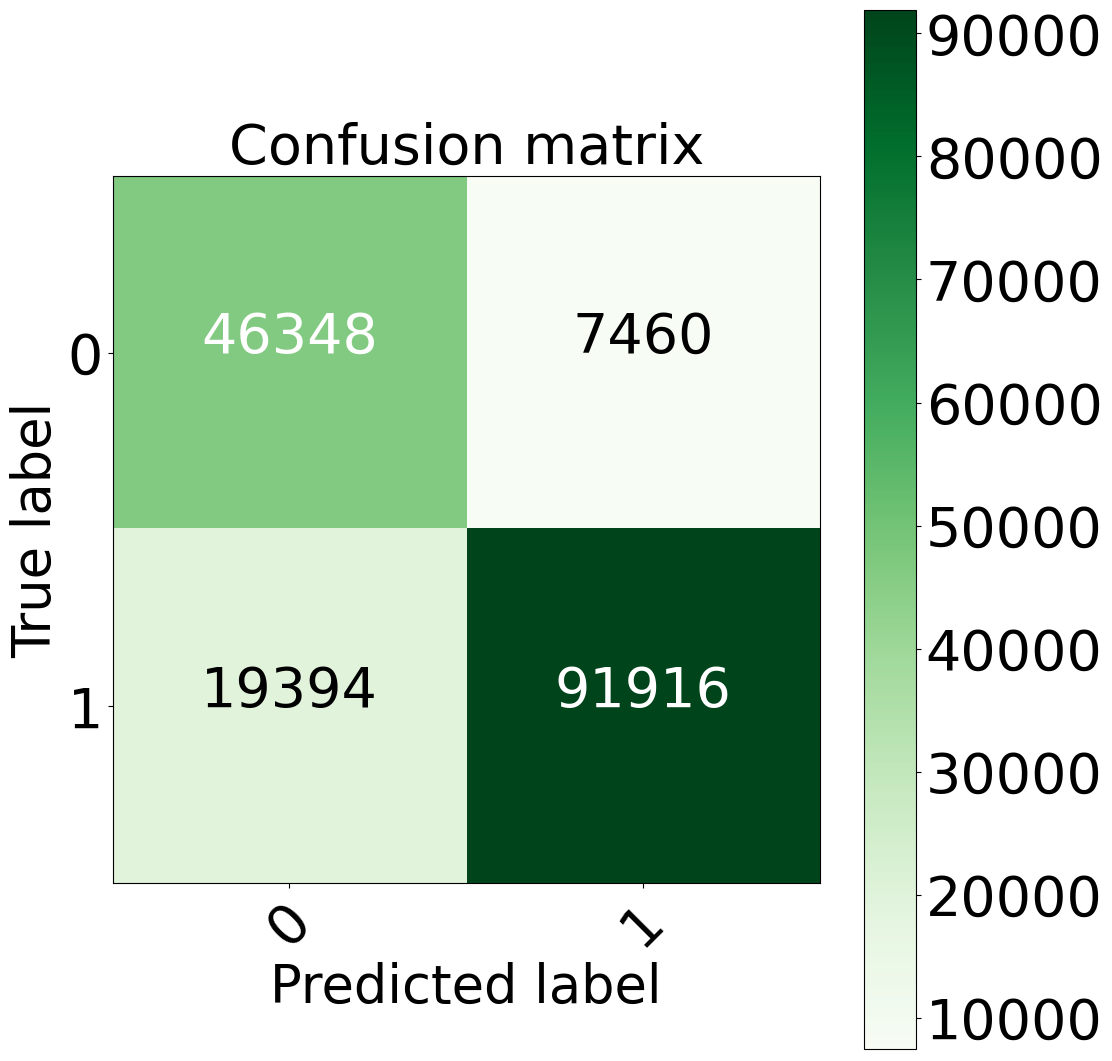

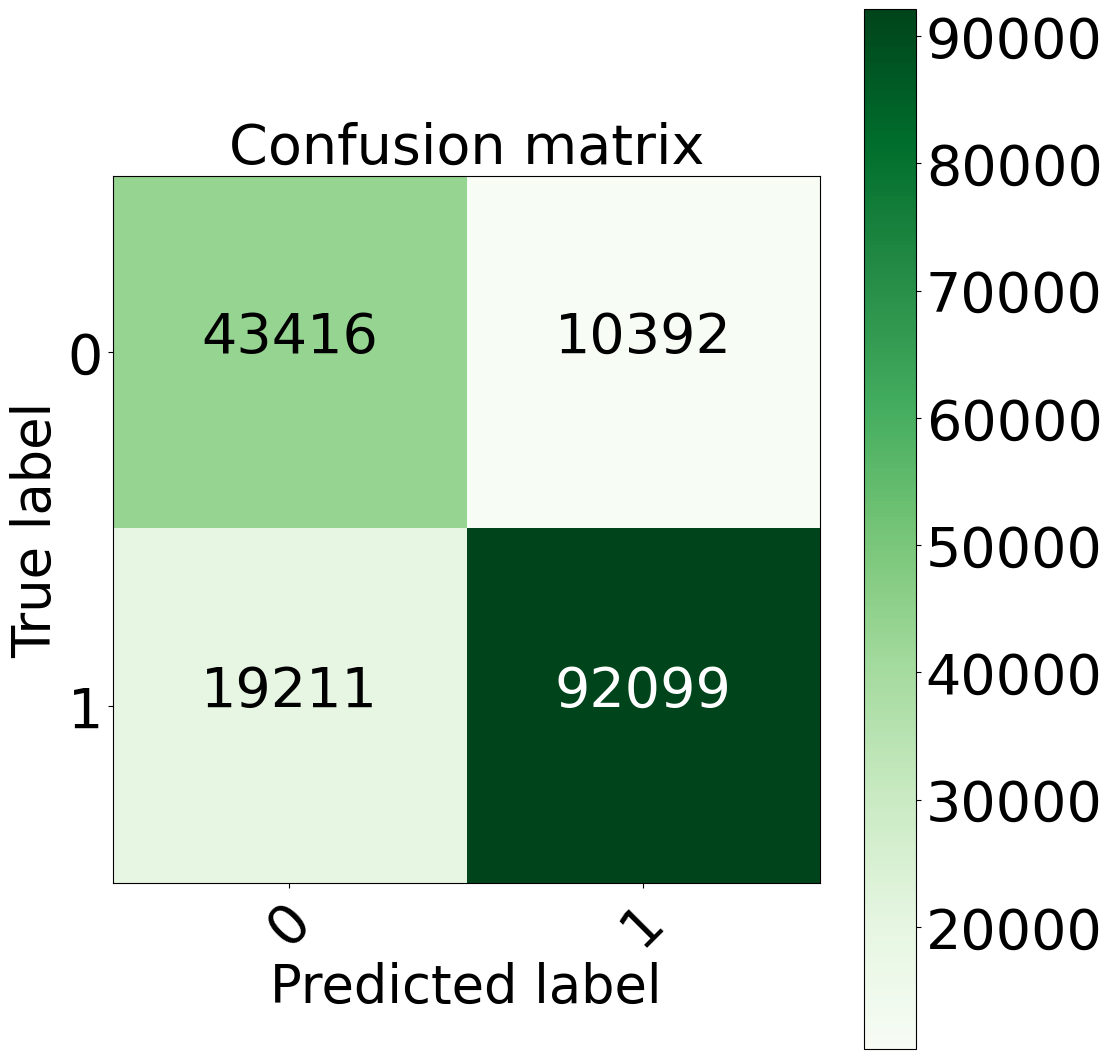

In [30]:
#plot confusion matrix plot_with label

import itertools
import numpy as np
import matplotlib.pyplot as plt
label_y = np.array([0,1])
def confusion_matrix_visual(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens, fs=(12,12),font_size=40):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=fs);
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=font_size)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.rcParams.update({'font.size': 40})
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=font_size-2)
    plt.xlabel('Predicted label', fontsize=font_size-2)
    plt.tight_layout()


# confusion matrix for random forest
confusion_matrix_visual(cnf_forest,classes = label_y, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)

# confusion matrix for logistic regression classifier
confusion_matrix_visual(cnf_logreg,classes = label_y,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)

# confusion matrix for decision tree classifier
confusion_matrix_visual(cnf_tree,classes = label_y,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)

# confusion matrix for naive bayes classifier
confusion_matrix_visual(cnf_gnb,classes = label_y,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)

# confusion matrix for xgboost classifier
confusion_matrix_visual(cnf_xgb,classes = label_y,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)

# confusion matrix for knn classifier
confusion_matrix_visual(cnf_knn,classes = label_y,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens, fs=(12,12),font_size=40)